# 1. Data Preperation

First, install the neccesary libraries and import modules

In [30]:
#!pip install pandas
#!pip install numpy
#!pip install textblob
#!pip install nltk

In [31]:
import pandas as pd
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

Also change the pandas display max column width parameter so the entire output is visible

In [2]:
pd.set_option('display.max_colwidth', None)

### 1.1 Data Preprocessing

Read the input jsonl file to an intermediate dataframe. <br>For this prototype, we will be working with the 'medicine' subset of the entire HC3 dataset. This subset is about 5% of the HC3 dataset.

In [3]:
# convert jsonl to dataframe
with open('medicine.jsonl') as f:
    # read lines from jsonl into an intermediate df
    lines = f.read().splitlines()
    df_inter = pd.DataFrame(lines)
    df_inter.columns = ['json_element']

In [4]:
df_inter.sample(3)

,json_element
575,"{""question"":""How to treat pain during masturbation?my name is matshepo i was dignosed with endometriosis in 2008 and had a laparotomy done in june of same year.my problem is that the operation didn't help i even had to quit my job,i was told that my bowel is adherent to uterus.i'm 29 and everytime i menstruate is so painful and it becomes worse when a flesh like thing comes out.what can i do to help myself?"",""human_answers"":[""Hi, Endometriosis will cause such pain. You may have to be on regular oral contraceptive pills if not married. If married planning for pregnancy is the best solution. Hope I have answered your query. Let me know if I can assist you further. Regards,Dr. B. Radhakrishnan. Nair, OBGYN""],""chatgpt_answers"":[""I'm sorry to hear about the pain you are experiencing. Endometriosis is a condition in which tissue similar to the lining of the uterus grows outside of the uterus, and it can cause pain during menstruation and sexual activity. Masturbation itself should not cause pain, but if you are experiencing pain during masturbation it could be due to the endometriosis or another underlying issue.\n\nThere are several things you can try to help manage the pain you are experiencing:\n\nTalk to your doctor: It's important to discuss your symptoms with your doctor so they can determine the cause of the pain and recommend appropriate treatment. Your doctor may suggest medication, hormone therapy, or surgery to manage your endometriosis.\n\nPractice relaxation techniques: Stress and anxiety can make pain worse, so finding ways to relax and reduce stress can help manage pain. Techniques such as deep breathing, meditation, or yoga may be helpful.\n\nUse over-the-counter pain medication: Non-steroidal anti-inflammatory drugs (NSAIDs) such as ibuprofen or naproxen can help relieve pain.\n\nUse heat or cold therapy: Applying heat or cold to the painful area may help reduce inflammation and alleviate pain.\n\nTry different sexual positions: Some positions may be more comfortable than others, so experimenting with different positions during masturbation or sexual activity may help reduce pain.\n\nIt's important to remember that everyone's experience with endometriosis is different, and what works for one person may not work for another. It's important to work with your doctor to determine the best treatment plan for you.""]}"
170,"{""question"":""Have nausea, tinnitus, hearing loss. Gall bladder US clear. Any ideas?I have had an endoscopy done last week. Nothing was found. I then had an ultrasound of my gall bladder and all was clear. I still have short bouts of nausea. I do have an inner ear issue with tinnitus and some minor high frequency hearing loss . Any ideas on the nausea? I currently take omeprazole daily and Gaviscon liquid on a needed basis."",""human_answers"":[""Dear friend, welcome to HCM.it clearly is an inner ear issue. tinnitus, hearing loss, nausea are symptoms of ? labyrinthitis.or other lesionsdo you have imbalance while walking? and giddiness\/ rotation feeling?i think you should be visiting a good ENT specialist who is good in middle ear and labyrinth problems.you can try labyrinthine sedatives\/ antiemetics till then.take care and keep me posted on your progress.Good luck !""],""chatgpt_answers"":[""!\nToo many requests in 1 hour. Try again later.\n\n\n\nThere was an error generating a response"",""There are many potential causes of nausea and tinnitus, and it's possible that the two symptoms could be related. It's important to discuss your symptoms with a healthcare provider to determine the cause and receive proper treatment.\n\nNausea can be caused by a variety of factors, including digestive issues, motion sickness, certain medications, and anxiety or stress. It's possible that the omeprazole you are taking for acid reflux could be causing the nausea, but it's also possible that it could be caused by something else.\n\nTinnitus, or ringing in the ears, can be caused by a v

Next, split the dataframe into its respective columns

In [5]:
#normalise the intermediate dataframe to seperate the data into columns
df = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [6]:
df.sample(3)

,question,human_answers,chatgpt_answers
602,Does Nano-Leo help with sperm morphology and low sperm count?We went for fertility issues. Doctor prescribed me Nano-leo even though I don t have ED problem or low testosterone problem. My issue is more with sperm morphology (2% strict kruger) or lowish count (40m/ml) but according to the info on web Nano-Leo does not help with that. Should I still take it?,"[Hello, it is not a good option and thus you need to get proper hormone profile done and then take necessary hormones and drugsIn case you have any questions in future you can contact me directly on http://bit.ly/drmanishajain]","[Nano-Leo is a dietary supplement that contains a combination of ingredients, including L-arginine, which is an amino acid that has been suggested to improve blood flow and circulation. Some people claim that Nano-Leo may help improve fertility and treat erectile dysfunction (ED). However, there is limited scientific evidence to support these claims.\n\nIt is important to note that Nano-Leo is not a medication and is not intended to diagnose, treat, cure, or prevent any disease. If you are concerned about fertility issues, it is important to speak with a healthcare professional who can properly diagnose and treat any underlying medical conditions. While supplements like Nano-Leo may be marketed as fertility aids, there is no guarantee that they will be effective, and they may not be suitable for everyone.\n\nIf you have been prescribed Nano-Leo by a healthcare professional, it is important to follow their instructions and to discuss any concerns or questions you may have about its use. It is also important to speak with your healthcare professional about the best course of treatment for your specific fertility issues. They may recommend a combination of treatments, such as lifestyle changes, medication, or assisted reproductive technologies, depending on the cause of your fertility issues and your individual circumstances.]"
1047,"Q. I had two menstrual cycles in one month. Is it something serious?Hello doctor,I had two menstrual cycles in one month, two weeks apart. I have not had an intercourse for two months. Should I be concerned?",[Hello. For more information consult an obstetrician and gynaecologist online --> https://icliniq.com./ask-a-doctor-online/obstetrician-and-gynaecologist],"[It is not uncommon for women to have irregular menstrual cycles, and having two periods in one month can be a normal occurrence in some cases. However, it is important to pay attention to any changes in your menstrual cycle and to speak with a healthcare provider if you have any concerns.\n\nThere are many potential causes of irregular menstrual cycles, including stress, weight changes, certain medications, and underlying health conditions. In some cases, irregular periods may be a sign of a hormonal imbalance or other underlying health issue that may need to be addressed.\n\nIf you have not had sexual intercourse for the past two months, it is unlikely that pregnancy is the cause of your irregular menstrual cycles. However, it is still a good idea to speak with a healthcare provider for a proper evaluation and to rule out any other potential causes. They will be able to perform an examination, review your medical history, and possibly order tests to determine the cause of your irregular periods. They can then provide you with appropriate treatment or recommendations as needed.]"
561,Is it dangerous to breastfeed a baby while on Metronidazole?im a lactating mother to a 6month old child. i have been diagnosed w/ amoebiasis and was prescribed with Metronidazole. My child wont accept bottled milk so i am forced to let her still feed through me. Is it risky for my child? what other medicine can replaced Metronidazole that can be good for my child?,"[Hi, Welcome to HCM. I have read your question in detail and I know that you are very concerned about your child. Metronidazole doesn't pass through breast milk and will have no

### 1.2 Data Cleaning

First, inspect the data for missing values.

In [7]:
# find any missing/NA values
df.isna().sum()

question           0
human_answers      0
chatgpt_answers    0
dtype: int64

No missing values were found.

Since each answer is a list, a list containing just empty strings will not be considered by panda's isna() function as a NA value. Thus, we will also inspect the dataframe for empty strings.

In [8]:
#check for empty strings
for i in range(len(df)):
    human_ans = df.at[i, 'human_answers']
    gpt_ans = df.at[i, 'chatgpt_answers']
    if '' in human_ans or '' in gpt_ans:
        print('empty string at ' + str(i) + ', dropping row')
        df.drop(i, axis=0, inplace=True)

empty string at 758, dropping row
empty string at 946, dropping row
empty string at 1209, dropping row


Some empty strings were found. Since these empty strings make up an insignificant portion of the dataset (0.24%), they can be removed without significantly changing the makeup of the dataset.

Next, reset the indexes of the dataset without the removed rows (so that it can be iterated over later)

In [9]:
df.reset_index(inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

We will describe the dataset to inspect the values contained within

In [10]:
df.describe(include='all')

,question,human_answers,chatgpt_answers
count,1245,1245,1245
unique,1245,1243,1237
top,Does Primolut N taken during pregnancy affect the baby?Hi doctor..I have taken primoult n tablet twice daily for 5 days to delay my periods in the month of march.I was not aware of the pregnancy at that time but now when I tested in April month it is positive in pregnancy.so my question here is does this tablet effect my baby,"[Hi...Thank you for consulting in Health Care magic. Skin conditions are best diagnosed only after seeing directly. I suggest you to upload photographs of the same on this website, so that I can guide you scientifically. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Health care magic are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health.Dr. Sumanth MBBS., DCH., DNB (Paed).,]",[!\nToo many requests in 1 hour. Try again later.\n\n\n\nThere was an error generating a response]
freq,1,3,9


There are some duplicated values in the 'human_answers' column.

We will explore these duplicated answers further.

In [11]:
df[df['human_answers'].duplicated(keep=False)]

,question,human_answers,chatgpt_answers
415,"Suggest treatment for dermatitis in a 11 years old childMy 11 year old son most likely has perioral dermatitis from over use of steriod on his rash on the sides of his nose, elidel is not helping much and we have been using it for like 6 months...family doctor gave us mipirocin to try but its redder and crusty lookign now.","[Hi...Thank you for consulting in Health Care magic. Skin conditions are best diagnosed only after seeing directly. I suggest you to upload photographs of the same on this website, so that I can guide you scientifically. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Health care magic are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health.Dr. Sumanth MBBS., DCH., DNB (Paed).,]","[I'm sorry to hear that your son is experiencing discomfort and skin irritation. Perioral dermatitis is a type of facial rash that can be caused by a variety of factors, including the use of topical steroids, certain skin care products, and certain medications. It is important to work closely with a healthcare provider to determine the most appropriate treatment for your son's specific case.\n\nTreatment for perioral dermatitis may include the following:\n\nAvoiding the use of topical steroids and certain skin care products, such as facial cleansers and creams that contain ingredients that can irritate the skin.\n\nUsing a mild, non-irritating facial cleanser and moisturizer.\n\nApplying a topical antibiotic, such as mupirocin, to the affected area as directed by a healthcare provider.\n\nTaking an oral antibiotic if a bacterial infection is present or suspected.\n\nUsing a mild corticosteroid cream under the supervision of a healthcare provider.\n\nIt is important to follow the treatment plan recommended by your son's healthcare provider, as well as to practice good skin care habits, such as washing the face gently with a mild cleanser and using a non-irritating moisturizer. If the condition does not improve with treatment or if it worsens, it is important to contact a healthcare provider for further evaluation and management.]"
694,What could the bumps on the hip of a child be indicative of?My daughter is 5 years old ans she has like 7 little bumps on the right side of her hip and they are not chicken poxs they are hard kinda and at one point they were red and now they are turning a brown colorcan you tell me what they could possibly be?,"[Hi...Thank you for consulting in Health Care magic. Skin conditions are best diagnosed only after seeing directly. I suggest you to upload photographs of the same on this website, so that I can guide you scientifically. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Health care magic are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health.Dr. Sumanth MBBS., DCH., DNB (Paed).,]","[It is not possible for me to accurately diagnose a medical condition without examining the individual and obtaining more information about their symptoms. It is important to consult a healthcare professional if you have concerns about your child's health.\n\nThere are many possible causes of bumps on the hip of a child, including infections, allergies, insect bites, and other skin conditions. Some possible causes of bumps on the hip that may be accompanied by redness and swelling include:\n\nInsect bites: Bites from insects such as mosquitoes, fleas, or bedbugs can cause bumps on the skin that may be red and swollen.\n\nAllergic reactions: Allergic reactions to medications, foods, or other substances can cause hives or other skin bumps.\n\nInfections: Bacterial or viral infections, such as impetigo or herpes, can cause bumps on the skin.\n\nOther skin conditions: Certain skin conditions, such as eczema or derma

These duplicated values are messages asking a patient to visit the doctor for a direct consultation for their skin issue. Since this is considered a valid human reply, we will keep these values.


Also, there are 8 rows (0.64%) of chatgpt answers that are duplicate error messages. These rows will be removed once the dataframe has been processed further (as it will be easier to remove them after the dataframe is converted to strings)

Next, we will inspect the dataframe's data types

In [12]:
# check datatypes
df.dtypes

question           object
human_answers      object
chatgpt_answers    object
dtype: object

The dataframe will be converted to the string datatype.

In [13]:
#convert to string
df = df.astype(str)

Next, we will need to strip the trailing/leading square brackets from the answers, and remove any newline characters (\n).

In [14]:
# strip leading/trailing square brackets and quotation marks
# remove all newline chars
for i in range(len(df)):
    human_ans = df.at[i, 'human_answers']
    human_ans = human_ans.lstrip('[\'\"')
    human_ans = human_ans.rstrip(']\'\"')
    human_ans = human_ans.replace('\\n', "")
    df.at[i, 'human_answers'] = human_ans

    gpt_ans = df.at[i, 'chatgpt_answers']
    gpt_ans = gpt_ans.lstrip('[\'\"')
    gpt_ans = gpt_ans.rstrip(']\'\"')
    gpt_ans = gpt_ans.replace('\\n', "")
    df.at[i, 'chatgpt_answers'] = gpt_ans

In [15]:
df.describe(include='all')

,question,human_answers,chatgpt_answers
count,1245,1245,1245
unique,1245,1243,1237
top,Does Primolut N taken during pregnancy affect the baby?Hi doctor..I have taken primoult n tablet twice daily for 5 days to delay my periods in the month of march.I was not aware of the pregnancy at that time but now when I tested in April month it is positive in pregnancy.so my question here is does this tablet effect my baby,"Hi...Thank you for consulting in Health Care magic. Skin conditions are best diagnosed only after seeing directly. I suggest you to upload photographs of the same on this website, so that I can guide you scientifically. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Health care magic are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health.Dr. Sumanth MBBS., DCH., DNB (Paed).,",!Too many requests in 1 hour. Try again later.There was an error generating a response
freq,1,3,9


Now that the dataframe has been converted to strings, we can easily remove the rows containing the chatgpt error messages

In [16]:
df = df[df['chatgpt_answers'] != '!Too many requests in 1 hour. Try again later.There was an error generating a response']

In [17]:
df.describe(include='all')

,question,human_answers,chatgpt_answers
count,1236,1236,1236
unique,1236,1234,1236
top,Does Primolut N taken during pregnancy affect the baby?Hi doctor..I have taken primoult n tablet twice daily for 5 days to delay my periods in the month of march.I was not aware of the pregnancy at that time but now when I tested in April month it is positive in pregnancy.so my question here is does this tablet effect my baby,"Hi...Thank you for consulting in Health Care magic. Skin conditions are best diagnosed only after seeing directly. I suggest you to upload photographs of the same on this website, so that I can guide you scientifically. Hope my answer was helpful for you. I am happy to help any time. Further clarifications and consultations on Health care magic are welcome. If you do not have any clarifications, you can close the discussion and rate the answer. Wish your kid good health.Dr. Sumanth MBBS., DCH., DNB (Paed).,","It is not recommended to use Primolut N during pregnancy, as it can cause harm to the developing baby. Primolut N is a medication that contains the hormone norethisterone, which is used to regulate the menstrual cycle and treat menstrual disorders. When taken during pregnancy, it can interfere with the normal development of the fetus and increase the risk of birth defects. If you are pregnant and have taken Primolut N, it is important to speak with your healthcare provider as soon as possible. They will be able to advise you on the best course of action and provide any necessary medical care to ensure the health and safety of you and your baby."
freq,1,3,1


### 1.3 Data Reshape

We will also need to reshape the dataframe to seperate human and chatgpt answers into distinct rows.

First, we will seperate the dataframe into 2 seperate dataframes, each containing only 1 type of answer.

We will also add an additional 'is_human' column to each dataframe, indicating if the answer was generated by a human

In [20]:
# retrieve human answers
df_human = df[['question', 'human_answers']].copy() #copy the question and human answers
df_human['is_human'] = 1 #set a column indicating if the answer is human
df_human.rename(columns = {'human_answers':'answer'}, inplace = True) # rename column to answer
df_human.sample(2)

,question,answer,is_human
471,Suggest treatment for chest and back pain with chillsI was pulling heavy carts at work yesterday when I felt something pop in my chest and immediately started having chest & back pains. My chest still hurts today but my back is in really bad pain. I ve also been getting chills all day but don t know if that has any connections with my injury.. Is there any convention? And should I go to a doctor?,"Hi while pulling heavy cart you have started back and chest pain and back hurts more.In my practice , with this pic I would suspect vertebral injury and go for an x ray of affected part to rule out any spinal compression fracture . Pain killers , back support , rest and physiotherapy will help relieve the pain and the rest will depend on x rays. Yes you should consult your doctor if the pain does not go away in few days.",1
366,"How to conceive while being treated for Cystitis and bilateral Poly cystic ovary ?Hi there, I m 24 years old and having bilateral PCOS and Cystitis last month. My OB told me not to have my diet since im only 40kgs at 4 11. My OB advise me to take YAZ for 3 mos. Hope you can help, as I want to get pregnant .","Hello dearFirst you check your all hormones level like LH, FSH, PRL, PROGESTRON, AND AMH with a combination of good diet and exercises also reduce the anxiety levelsRegards",1


In [21]:
# do the same for chatgpt answers
df_gpt = df[['question', 'chatgpt_answers']].copy()
df_gpt['is_human'] = 0
df_gpt.rename(columns = {'chatgpt_answers':'answer'}, inplace = True)
df_gpt.sample(2)

,question,answer,is_human
799,"Have prostrate elongation problem. Suggested renopho, active, nexiron. Possibility of reducing the medicines?hello sir my father is ailing from one of kidney problem (some prostrate elongation problem) blood urea-65mg/l screatinine 4.1 mg and he has been suggested following medics renopho.s, active(2.25), nexiron, aplazar, lezon(5mg), cudoforte capsule. Could you please help me to reduce my medicines if possible. In any way u could help me i will be very grateful to youRegards","I'm sorry to hear about your father's health condition. It is important to note that the treatment for a kidney problem, including the use of medications, will depend on the specific cause and severity of the condition. The medications that your father has been prescribed are likely intended to address his specific health needs and it is not appropriate for me to recommend changes to his treatment plan without a thorough understanding of his medical history and current health status.It is important that your father follows the treatment plan prescribed by his healthcare provider and takes his medications as directed. If you have concerns about the medications he is taking or the treatment plan in general, it is important to discuss these with his healthcare provider. They will be able to provide you with more information and guidance on your father's specific situation.",0
350,"Abdominal pain, prescribed silbostin and BP tablet. Had pain before and diagnosed fatty lever stage-I and curedSir, i feel my upper aqbdoman pain and go to cunsult with doctor doctor advise me to full abdoman ultrasound and fount fatty lever stage -I and after 6 month medicin i got releaf. and now after feeling realif 4 months feeling pain. again i cunsult with doctor he is giving me silbostin tablet. and my BP is also 96 134 he also giving me BP medicin. kindly guide me.","I'm sorry to hear that you are experiencing abdominal pain and have been prescribed Silbostin and a blood pressure medication. It's important to follow your doctor's advice and take your medications as directed.Fatty liver disease, also known as hepatic steatosis, is a condition in which excess fat accumulates in the liver. It can be caused by a variety of factors, including obesity, high cholesterol, and high blood sugar levels. If left untreated, it can lead to more serious liver problems such as cirrhosis or liver failure.Silbostin is a medication that is used to treat certain types of cancer, such as breast cancer and ovarian cancer. It is not typically used to treat fatty liver disease. If you have been prescribed Silbostin, it is important to follow your doctor's instructions and ask any questions you may have about the medication.It is also important to manage any underlying conditions that may be contributing to your abdominal pain, such as high blood pressure. Be sure to follow your doctor's recommendations for managing your blood pressure, including taking your blood pressure medication as directed and making lifestyle changes such as eating a healthy diet, getting regular exercise, and avoiding tobacco and excessive alcohol consumption.If you continue to experience abdominal pain or have any other concerns, it is important to speak with your doctor. They will be able to provide further guidance and help determine the cause of your symptoms.",0


Next, both dataframes will be concatenated to join them together into a cleaned dataframe

In [23]:
# concat both dataframes
df_cleaned = pd.concat([df_human, df_gpt])
df_cleaned.sample(3)

,question,answer,is_human
567,"Suggest remedy for fever,cough and stuffy nosemy seven months old girl have fever and then chill only at night time ,it happen on 2 nights( friday. sat).she look tired and sleepy, still eat but less than usual,cough abit and vomit abit when she cough.stuffy nose. my husband is sick,she get it from him,?????what can help her better","Hello, dont worry.its viral fever , give her syp paracetamol 75 mg , solvin cold Af drops 10 drops three timse a day, normal saline nasal drops for nasal blockage.it may take 5-7 days to recover",1
765,"Feeling of fear on seeing new person, driving, fan movements. No relief with treatment. Cause and remedy?hi i am S.K.NAG from bhubaneswar,i am always feel affraid to see building,new peson ,whn drive bike,when i sleep at room ,to fan movement, when i going on lift ,when i see showroom.i am suffering this since last 1 year,i am consult doctor but i am not ok til now. plase give me information about the problem what can i do .","It sounds like you are experiencing symptoms of anxiety. Anxiety is a normal response to stress and can be beneficial in some situations, but chronic anxiety can interfere with daily life. There are a number of treatment options available for anxiety, including therapy, medication, and self-care strategies.If your symptoms are severe or if you have trouble functioning because of your anxiety, it's important to seek help from a mental health professional. A therapist or counselor can help you identify the causes of your anxiety and develop coping strategies to manage your symptoms. They can also help you learn relaxation techniques, such as deep breathing, progressive muscle relaxation, or mindfulness, which can be helpful in reducing anxiety.Medication can also be an effective treatment for anxiety. Your doctor or a mental health professional can help you determine if medication is appropriate for you and can prescribe a medication that is right for you.In addition to seeking professional help, there are also several self-care strategies that can be helpful in managing anxiety:Exercise regularly, as it can help reduce stress and improve your moodEat a healthy diet and get enough sleepPractice relaxation techniques, such as deep breathing, meditation, or yogaAvoid caffeine and alcohol, as they can increase anxietyConnect with others and engage in activities that you enjoyLimit your exposure to triggers that cause anxiety, such as certain news programs or social mediaIt's important to be patient and consistent in your treatment, as it can take time to see improvement. It's also important to communicate with your therapist or doctor if your symptoms are not improving, as they may need to adjust your treatment plan.",0
1227,"How can I remove dark spots due to skin cell rupture ?sir , i have some injury on my face , which causes my skin cell rupture perhaps , so dark spot come, how can i remove this????????",hiit depend how deep the scar is?better to consult dermatologist.if not then apply HEXILAK cream over it,1


We will also use the panda's value_counts function to ensure that there is the expected number of each type of answer

In [25]:
# sum is_human to ensure there is a 50:50 split of answers
df_cleaned['is_human'].value_counts()

1    1236
0    1236
Name: is_human, dtype: int64

Lastly, we will shuffle the order of the answers

In [26]:
# shuffle human and chatgpt generated answers
df_cleaned = df_cleaned.sample(frac = 1).reset_index(drop=True)

In [27]:
df_cleaned.sample(3)

,question,answer,is_human
540,"What are the chances of pregnancy in HBV negative wife & HBV positive husband?I have been TTC from past 1.5 years. The blood test resulted all normal for me and for my husband, it is Hepatitis - B positive. Will this is the cause for not getting conceived (Wife being HBV - negative and Husband being HBV - positive) ? What is the solution if we want to conceive?","It is generally safe for an HBV-negative woman to become pregnant with an HBV-positive man. The risk of transmission of HBV from an HBV-positive man to an HBV-negative woman during pregnancy or childbirth is relatively low, and can be further reduced with proper preventive measures.If you and your husband are planning to conceive and you are HBV-negative, it is recommended that you get vaccinated against HBV before becoming pregnant. This will provide you with immunity to the virus and reduce the risk of transmission to you and your baby.If you are unable to get vaccinated before becoming pregnant, you should discuss the options for preventing transmission of HBV with your healthcare provider. This may include receiving immune globulin and/or antiviral medications during pregnancy.It is also important for your husband to manage his HBV infection by taking his medications as prescribed and practicing safe sex to reduce the risk of transmission to you and any children you may have.If you have been trying to conceive for over a year without success, it is important to consult with a healthcare provider to determine the cause and discuss treatment options. There may be other factors contributing to your difficulty conceiving, such as fertility issues or underlying health conditions. A healthcare provider can help you assess your fertility and discuss options for increasing your chances of conceiving.",0
1094,"Is a painful, dry and cracked wart dangerous?I believe I have a wart on my leg, but it has been there for several years. It has actually gotten bigger and now the top is dried and cracked in half. It did not respond to otc medicine and it has became painful. Could it be something besides a wart?","A wart that is painful and has become dry and cracked can be a sign of a more serious issue. It is possible that the wart has become infected or that it is not a wart at all, but rather a different type of growth. It is important to have any unusual growth on your skin checked by a healthcare professional to determine the cause and appropriate treatment. They will be able to examine the growth and determine if it is a wart or something else, and recommend the appropriate course of treatment. It is not recommended to try to treat the growth at home, as this can potentially make the situation worse or lead to further complications.",0
1373,Noticed pink mucus during periods is it normal ?Yes I didn't have a period for 4 months and on wasn't having sex at the time I started having sex again in dec and I came on my period dec7-dec 13 then again dec23-27 and now today dec 29 when I go to wipe after voiding on the toilet paper it had lite pink mucus like on it ! Can you explain to me what may be happening should I be worried?,"Hi,The possible causes for the spotting are :-According to your menstrual history, there is possibility of hormonal imbalance. Hormonal imbalance can lead to intermenstrual spotting, prolonged spotting after cessation of menstrual flow etc symptoms. - Post coital tear- Local lesions like cervical erosion, polyps etc. If the spotting subsides and if you get your next cycle as expected, no need to worry. If the spotting continues or recurs in next menstrual cycles, better to get evaluated. Go for examination, ultrasound and hormonal profile including estrogen, progesterone, LH and FSH. With this workup the possible cause for your problem can be identified and treated. Take care.",1


### 1.3 Data Construction

We will also create a lemmatised, stopword-less version of each answer for later usage.

First, initialise the lemmatiser, and the corpus of stopwords. The corpus used will be NLTK's general English stopword corpus.

In [32]:
# init lemmatiser and stopwords
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')
# also create empty column for filtered answer
df_cleaned['filtered_answer'] = ""

Next, iterate through each answer, removing the stopwords and lemmatising the answer.

In [33]:
for i in range(len(df_cleaned)):
    answer = df_cleaned.at[i, 'answer']
    # tokenise the answer
    tokens = word_tokenize(answer)
    # remove stopwords
    tokens_no_stopwords = [token for token in tokens if token not in stopwords]
    # lemmatise answer
    lemmatised_tokens = [lemmatizer.lemmatize(token) for token in tokens_no_stopwords]
    # store filtered answer in new column
    df_cleaned.at[i, 'filtered_answer'] = ' '.join(lemmatised_tokens)

In [34]:
df_cleaned.sample(3)

,question,answer,is_human,filtered_answer
231,"Any suggestion for having SGPT level of 133?My age is 42 and male. I had a dengue fever 10 days back and my platelet count is 95 K. and serum biluribin is .08-1.00. which is in normal lable. . after that one more count of pletelet which is now 1,90,000.00. but my sgpt is quite high is 133. Pls advise.","Elevated levels of SGPT (serum glutamic-pyruvic transaminase), also known as alanine aminotransferase (ALT), can be a sign of liver damage or disease. It is important to consult with a healthcare professional for proper diagnosis and treatment.There are many potential causes of elevated SGPT, including viral infections such as hepatitis, alcohol abuse, and certain medications. In your case, it is possible that the dengue fever you had may have contributed to the elevation in your SGPT level.It is important to follow the advice of your healthcare provider and to undergo further testing to determine the underlying cause of your elevated SGPT. This may include blood tests, imaging studies, and possibly a liver biopsy. Treatment may involve medications, lifestyle changes, or in some cases, surgery.It is also important to maintain a healthy lifestyle, including eating a well-balanced diet, avoiding alcohol or limiting consumption, and exercising regularly to support liver health.",0,"Elevated level SGPT ( serum glutamic-pyruvic transaminase ) , also known alanine aminotransferase ( ALT ) , sign liver damage disease . It important consult healthcare professional proper diagnosis treatment.There many potential cause elevated SGPT , including viral infection hepatitis , alcohol abuse , certain medication . In case , possible dengue fever may contributed elevation SGPT level.It important follow advice healthcare provider undergo testing determine underlying cause elevated SGPT . This may include blood test , imaging study , possibly liver biopsy . Treatment may involve medication , lifestyle change , case , surgery.It also important maintain healthy lifestyle , including eating well-balanced diet , avoiding alcohol limiting consumption , exercising regularly support liver health ."
320,"Recurring pain in upper left abdomen, occurs on yawning, coughing, shallow breathing. Causes for symptoms?I have been experiencing recurring pain in my upper left abdomen - this is my 3rd attach in 7 weeks. Usually the pain will be severe for the first 2 - 3 days and then will mainly become troublesome when yawning / coughing / deep breathing. There are times when the pain can be bad it prevents me from breathing properly - mainly shallow breathing . Any suggestions of what this could be?","Hi,Thanks for posting your query.With the available described symptoms and location of pain, there appears to be possibilities of left sided chest pathology, splenic flexure (part of large intestine) obstruction, left kidney stones.You should consult with internal medicine specialist/ general surgeon and should go for thorough check up.You should go for ultrasound imaging and chest x ray on preliminary basis.If necessary then you should also go CT abdomen and colonscopy.mean while, you should take antispasmodics along with NSAIDs.You should take soft diet and do bed rest.take care,Dr. Mayank Bhargava",1,"Hi , Thanks posting query.With available described symptom location pain , appears possibility left sided chest pathology , splenic flexure ( part large intestine ) obstruction , left kidney stones.You consult internal medicine specialist/ general surgeon go thorough check up.You go ultrasound imaging chest x ray preliminary basis.If necessary also go CT abdomen colonscopy.mean , take antispasmodic along NSAIDs.You take soft diet bed rest.take care , Dr . Mayank Bhargava"
1335,Upper right abdominal pain radiating to back soon after eating food. Ultrasound normal. Suggestions?i get pain in the upper right abdomen which at time moves to the back...i did ultrasound of abdomen and pelvis ..but everything seems to be normal. d

# 2. Feature Extraction

### 2.1 Basic Textual Features

First, import additional modules and initialise empty columns for the extracted features.

In [35]:
from nltk.tokenize import sent_tokenize

In [36]:
df_cleaned['word_count'] = 0
df_cleaned['sentence_count'] = 0
df_cleaned['avg_sentence_len'] = 0

Next, iterate through each answer, extracting the word count, sentence count, and average sentence length.

In [38]:
for i in range(len(df_cleaned)):
    answer = df_cleaned.at[i, 'answer']
    #tokenise answer into sentences
    sentence_count = len(sent_tokenize(answer))
    #tokenise answer into words
    word_count = len(word_tokenize(answer))
    #store sentence/word count
    df_cleaned.at[i, 'sentence_count'] = sentence_count
    df_cleaned.at[i, 'word_count'] = word_count
    #compute and store average sentece length
    df_cleaned.at[i, 'avg_sentence_len'] = word_count/sentence_count

In [40]:
df_cleaned.sample(2)

,question,answer,is_human,filtered_answer,word_count,sentence_count,avg_sentence_len
543,"Painful leg and hand cramps, worse at night. Taking chemotherapy for bowel cancer. Treatment?My mother has been having painful foot leg and hand cramps and they are becoming unbearable. She had chemotherpy last year the final dose being december the cancer was of the bowel and her latest 6 month test says she is in remission, would the chemo be responsible for her symptoms and is there anything she can do to relieve them ? they seem to be worse at night.","Your mother is suffering from CIPN meaning chemotherapy induced peripheral neuropathy.Peripheral neuropathy is disorder of nerves apart from the brain and spinal cord. Patients with peripheral neuropathy may have tingling, numbness, unusual sensations, weakness, or burning pain in the affected area. Oftentimes, the symptoms are symmetrical and involve both hands and feet. Because the symptoms are often present in the areas covered by gloves or stockings, peripheral neuropathy is often described as having a “glove and stocking” distribution of symptoms.Chemotherapeutic drugs cause peripheral neuropathy, including the plant alkaloids (vincristine and vinblastine), taxanes (paclitaxel and docetaxel , platinum-based compounds (cisplatin,carboplatin and oxaliplatin).Your mother has bowel cancer and is most probably using chemotherapy drug oxaliplatin which causes the ocuurence of CIPN is as high as 70 to 90%.CIPN takes time to get reduced.It takes about 6 months to 1 year after completion of chemotherapy to get reduced totally.Your mother can take tablet Lyrica 75 mg twice daily after food for 1 month.It contains pregabalin which will help her to reduce her painful condition.",1,"Your mother suffering CIPN meaning chemotherapy induced peripheral neuropathy.Peripheral neuropathy disorder nerve apart brain spinal cord . Patients peripheral neuropathy may tingling , numbness , unusual sensation , weakness , burning pain affected area . Oftentimes , symptom symmetrical involve hand foot . Because symptom often present area covered glove stocking , peripheral neuropathy often described “ glove stocking ” distribution symptoms.Chemotherapeutic drug cause peripheral neuropathy , including plant alkaloid ( vincristine vinblastine ) , taxanes ( paclitaxel docetaxel , platinum-based compound ( cisplatin , carboplatin oxaliplatin ) .Your mother bowel cancer probably using chemotherapy drug oxaliplatin cause ocuurence CIPN high 70 90 % .CIPN take time get reduced.It take 6 month 1 year completion chemotherapy get reduced totally.Your mother take tablet Lyrica 75 mg twice daily food 1 month.It contains pregabalin help reduce painful condition .",195,4,48.750000
1872,What causes tightness around my chest while eating?hiI recently started having tightness around chest while eating food. Yesterday night I felt so full after my regular dinner and tightness in my chest . Let me know what is wrong. Does consuming hot food make this happen? I have thyroid and is the only medication I take. .25mg capsules.,"Thanks for your question on Health Care Magic. I can understand your concern. In my opinion, you are mostly having GERD (gastroesophageal reflux disease). It is due to laxity of gastroesophageal sphincter. Because of this the acid of the stomach tends to come up in the esophagus and cause the symptoms of Central chest pain, fullness, chest pressure etc. So better to follow these steps. 1. Avoid stress and tension. 2. Avoid large meals, instead take frequent small meals. Avoid hot and spicy food. Avoid junk food. 3. Start proton pump inhibitors and prokinetic drugs. 4. Go for walk after meals. 5. Keep 2-3 pillows under head in the bed to prevent reflux. 6. Loose weight if you are obese. 7. Quit smoking and alcohol if you have these habits. Don't worry, you will be alright. Hope I have solved your query. Wish you good health. Thanks.",1,"Thanks question Health Care Magic . I understand concern . In opinion , mo

### 2.2 Sentiment Analysis

First, import additional modules and initialise empty columns for the extracted features.

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [42]:
df_cleaned['polarity'] = 0
df_cleaned['negativity'] = 0
df_cleaned['neutrality'] = 0
df_cleaned['subjectivity'] = 0

Next, initialise the NLTK VADER sentiment analyser

In [ ]:
analyser = SentimentIntensityAnalyzer()

Next, iterate through each filtered answer (lemmatised + stopwords removed), extracting the negativity (NLTK only), neutrality (NLTK only), polarity (both), and subjectivity (TextBlob only) of each answer.

In [ ]:
for i in range(len(df_cleaned)):
    answer = df_cleaned.at[i, 'filtered_answer']
    #analyse filetered answers
    nltk_scores = analyser.polarity_scores(answer)
    textblob_scores = TextBlob(answer).sentiment

    # extract neg and neu using nltk
    df_cleaned.at[i, 'negativity'] = nltk_scores['neg']
    df_cleaned.at[i, 'neutrality'] = nltk_scores['neu']
    # compute polarity using both
    df_cleaned.at[i, 'polarity'] = (nltk_scores['compound'] + textblob_scores.polarity)/2
    # extract subjectivity using textblob
    df_cleaned.at[i, 'subjectivity'] = textblob_scores.subjectivity

In [44]:
df_cleaned.sample(2)

,question,answer,is_human,filtered_answer,word_count,sentence_count,avg_sentence_len,polarity,negativity,neutrality,subjectivity
1856,"Q. I am experiencing heart flutters and skipped beats. Why?Hi doctor,I am a 24 year old male, who is 5.9 feet tall and weighs 160 lbs. I have been experiencing weird heart flutters and skipped beats. It mostly happens when I am at the gym lifting weight, and taking a deep breath in while doing so. I have always exercised without experiencing such feelings. It is very annoying, and I am quite concerned. Hope you can help.",Hello. Hope this helps you and get back if you have any doubts. For more information consult a cardiologist online --> https://www.icliniq.com/ask-a-doctor-online/cardiologist,1,Hello . Hope help get back doubt . For information consult cardiologist online -- > http : //www.icliniq.com/ask-a-doctor-online/cardiologist,27,3,9.0,0,0,0,0
1201,Is elevated PSA level symptom of cancer?HI I recently finished a 21 day course of cipro for an elevated psa of 4.46 which was discovered in May. The end result was an increase of my psa to over 5. I might add that I am 66 years old and less than a year ago my count was 2.9. I am to have a biopsy done in one weeks time. Does this signal that I have cancer?,"High PSA levels can also be due conditions other than prostate cancer like : prostatitis, enlarged prostate, etc. Clinical examination and imaging studies like Ultrasound may be advised to pinpoint the cause along with biopsy. Examination of tissue under the microscope is always the definitive diagnosis of prostate cancer.",1,"High PSA level also due condition prostate cancer like : prostatitis , enlarged prostate , etc . Clinical examination imaging study like Ultrasound may advised pinpoint cause along biopsy . Examination tissue microscope always definitive diagnosis prostate cancer .",54,3,18.0,0,0,0,0


# 3. Model Training

First, install the scikit-learn package, and import modules.

In [45]:
#!pip install scikit-learn

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Split the dataset into independent variables (x) and the dependent (target) variable (y)

In [48]:
# split into target and independent variables
x = df_cleaned[['word_count', 'sentence_count', 'avg_sentence_len', 'polarity', 'negativity', 'neutrality', 'subjectivity']] # independent
y = df_cleaned['is_human'] # target

Additionally, we will also scale the x values using sci-kit's StandardScaler. This scales each x value so that they have the same scale and dimension, which prevents differently-scaled variables from introducting biases into the modelling.

In [49]:
# init scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Split data into testing (20%) and training (80%) sets using sklearn's train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

Initialise a logistic regression model, and train it on the training set

In [71]:
LR = LogisticRegression(max_iter=10000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Use the logistic regression model to predict the target (y) values. 

Also, we will generate the model's predicted probability of each class prediction

In [92]:
# generate prediction
y_prediction = LR.predict(x_test)

#generate probabilities
y_prob = LR.predict_proba(x_test)
# keep only the probability of the positive class
y_prob = y_prob[:, 1]

# 4. Evaluation

First, install the matplotlib and numpy packages, and import modules

In [ ]:
# !pip install matplotlib
# !pip install numpy

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

### 4.1 False Positive Rate, True Positive Rate, and Equal Error Rate

First, we will plot the model's confusion matrix

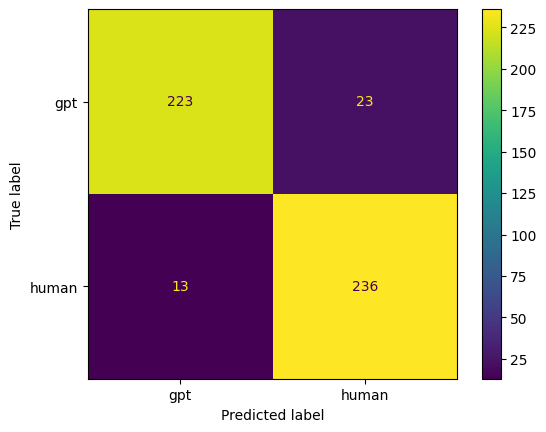

In [89]:
#create confusion matrix
con_matrix = confusion_matrix(y_test, y_prediction)
# create confusion matrix display
cm_display = ConfusionMatrixDisplay(con_matrix, display_labels=['gpt', 'human'])
#plot and show confusion matrix
cm_display.plot()
plt.show()

Next, we will use the values in the confusion matrix to calculate the model's False Positive Rate (FPR) and True Positive Rate (TPR)

In [90]:
# compute FPR and TPR (recall)
false_pos_rate = con_matrix[0][1] / (con_matrix[0][0] + con_matrix[0][1])
true_pos_rate = con_matrix[1][1] / (con_matrix[1][0] + con_matrix[1][1])

print(f'FPR is ' + format(false_pos_rate * 100, '.3f') + '%')
print(f'TPR is ' + format(true_pos_rate * 100, '.3f') + '%')

FPR is 9.350%
TPR is 94.779%


Lastly, we will compute the model's Equal Error Rate, using the method proposed in James S. [2017]

In [94]:
# generate roc curve, and fpr, tpr lists and the threshold
fpr, tpr, threshold = roc_curve(y_test, y_prob, pos_label = 1)
# compute false negative rate
fnr = 1 - tpr
# find the threshold where the EER occurs
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
#find EER
eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

print(f'EER is ' + format(eer * 100, '.3f') + '%')

EER is 7.317%


### 4.2 Accuracy and ROC Score

Use scikit-learn's built-in functions to find the model's accuracy and AUROC score

In [87]:
accuracy = accuracy_score(y_test,y_prediction)
roc_score = roc_auc_score(y_test,y_prediction)

In [88]:
print(f'Accuracy is ' + format(accuracy * 100, '.3f') + '%')
print(f'AUROC score is ' + format(roc_score * 100, '.3f') + '%')

Accuracy is 92.727%
AUROC score is 92.715%


# 5. References

[1] James S. 2017. Answer to “Equal Error Rate in Python.” Stack Overflow. Retrieved June 7, 2023 from https://stackoverflow.com/a/46026962
